# Masking


In [1]:
from skimage.morphology import skeletonize, dilation, opening, square, disk
from skimage.morphology import remove_small_holes, remove_small_objects # for filling the holes and denoising
import matplotlib.pyplot as plt

import numpy as np
import math
from skimage import io


from skimage.filters import threshold_mean#for binarising
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu, threshold_minimum, threshold_triangle, threshold_mean, threshold_li


# For watershed
from scipy import ndimage as ndi#for distance
from skimage.feature import peak_local_max 
from skimage.segmentation import watershed 
from skimage import measure #measure objects


In [2]:
def get_image(name):
    """ Using the skimage.io import the image with the file name.
    This function returns the gray image as numpy array """
    
    #Getting the image  
    #filename = '../Images/'+name
    filename = name
    image_gray = io.imread(filename, as_gray = True) 
    image_RGB = io.imread(filename, as_gray = False) 
    
    return image_gray, image_RGB

In [3]:
def show_image(image, label ="Image:", size=(6,2), cmap='viridis'):
    """This function shows/plots the given image."""
    plt.subplots(1,1,figsize=size)
    plt.title(label = label, fontsize=12)
    plt.imshow(image, cmap=cmap) 
    plt.show()

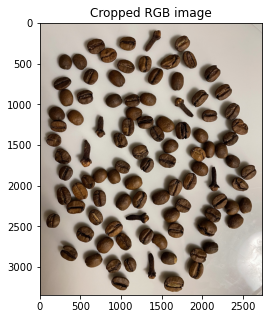

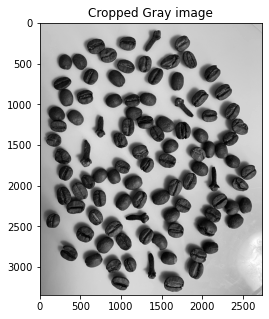

In [4]:
image_gray, image_RGB = get_image("coffeebeans.jpg")
# show_image(image, "Original Binary image")

#cropping the head
image_gray = image_gray[330:3670, 130:2860]    #[Row Y, COL, X]
image_RGB = image_RGB[330:3670, 130:2860]   #[Row Y, COL, X]

show_image(image_RGB, label ="Cropped RGB image", size=(10,5))
show_image(image_gray, label ="Cropped Gray image", size=(10,5), cmap='gray')

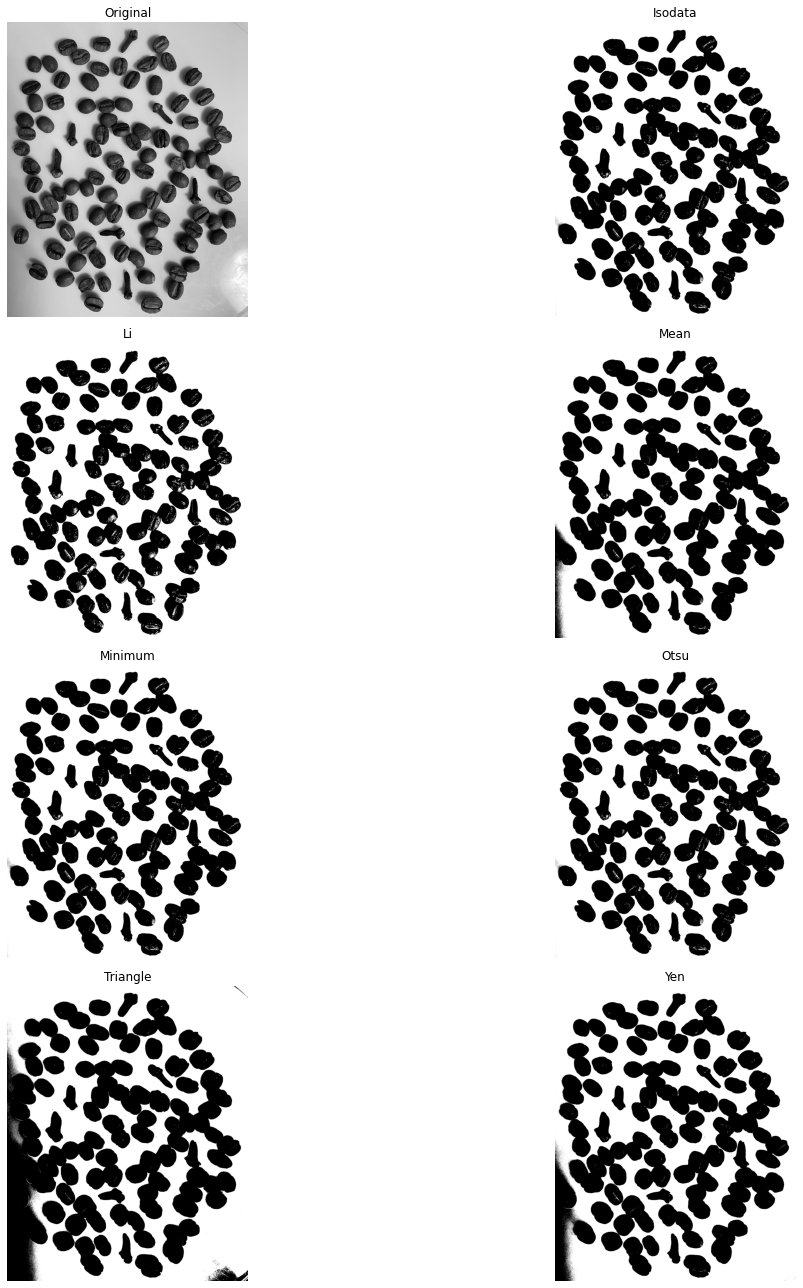

In [5]:
fig, ax = try_all_threshold(image_gray, figsize=(20, 18), verbose=False)
plt.show()

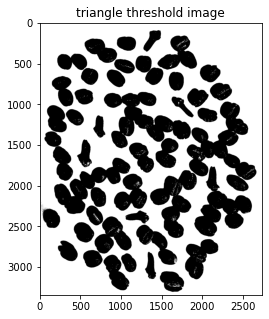

In [6]:
#binarising using triangle filter
thresh = threshold_otsu(image_gray)
binary_triangle = image_gray > thresh
show_image(binary_triangle, "triangle threshold image", (12,5), cmap='gray')

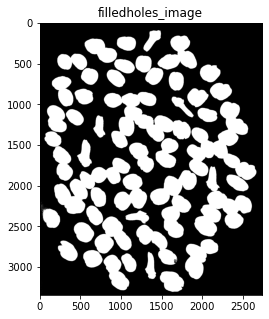

In [7]:
# fill holes
inverted_binary_triangle = np.invert(binary_triangle)
holes_filled = remove_small_holes(inverted_binary_triangle, area_threshold = 8000)
show_image(holes_filled, "filledholes_image", (12,5), cmap='gray')

In [8]:
# #removing noise
# filled_denoised_image = remove_small_objects(holes_filled, 1000)
# show_image(filled_denoised_image, "Image after filling holes and removing small objects", (12,5), cmap='gray')

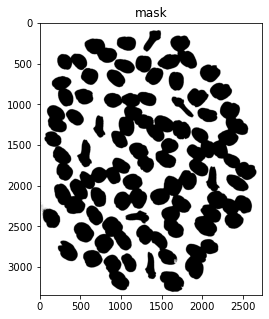

In [9]:
# Creating mask
mask = np.invert(holes_filled)*1.0
show_image(mask, "mask", (12,5), 'gray')

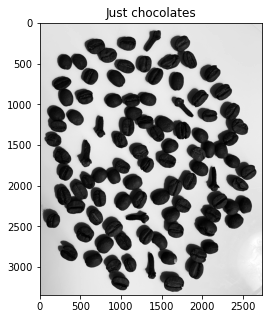

In [10]:
# Just the chocolates
just_chocolates =  mask + image_gray 
show_image(just_chocolates, "Just chocolates", (12,5), 'gray')

In [11]:
# print(mask)

In [12]:
from skimage.color import gray2rgb
RGB_mask = gray2rgb(mask)


(3340, 2730, 3)
(3340, 2730, 3)


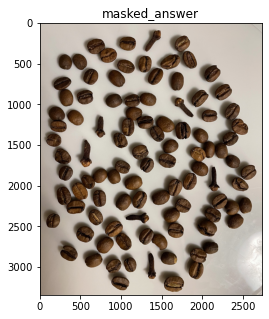

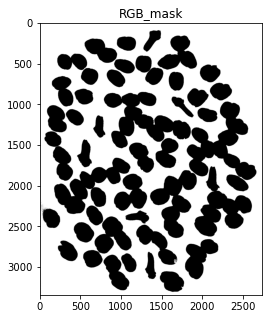

In [13]:
print(RGB_mask.shape)
print(image_RGB.shape)
masked_answer = image_RGB.copy()

show_image(masked_answer, "masked_answer", (12,5), 'gray')
show_image(RGB_mask, "RGB_mask", (12,5), 'gray')
# print(RGB_mask)



In [14]:
shape = np.shape(RGB_mask)
for i in range(shape[0]):
    for j in range(shape[1]):
        a, b, c = RGB_mask[i, j]
        if (a == 1.0) and (b== 1.0) and (c==1.0):
            masked_answer[i, j] = [255, 255, 255] 

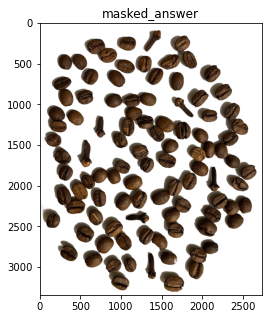

In [15]:
show_image(masked_answer, "masked_answer", (12,5))

In [16]:
# # show_image(masked_answer, "masked_answer", (12,5), 'gray')
# print(masked_answer)

# Masking in Image J
- image- type- 8 bit - adjust- triangle- autothreshold- 
- edit-invert [Fill holes ONLY WORKS WHEN THE OBJECT IS WHITE]
- process-binary-fill holes 
- edit-invert [For masking objects needs to be black/0]
- Process- image- calculator - Original Color image(image1) OR Mask (image2) 